# 📌 ACTIVIDAD 3: ÁRBOLES DE DECISIÓN PARA REGRESIÓN.

Crea el notebook saa_u03_p01_a3-<tus_iniciales>.ipynb donde entregar esta actividad. Los árboles
de decisión son propensos a presentar overfitting. En scikit-learn podemos reducirlo ajustando ciertos
hiperparámetros. En el caso de DecisionTreeRegressor:

 • Antes del entrenamiento:

 ◦ Limitar la profundidad del árbol (max_depth)

 ◦ Restringir el número mínimo de muestras por nodo (min_samples_split, min_samples_leaf)

 • Poda después del entrenamiento:

◦ Reducir la complejidad con "ccp_alfa".

 Utiliza los modelos
DecisionTreeRegressor,
GradientBoostingRegressor, XGBRegressor y
RandomForestRegressor para entrenarlos con los datos del ejercicio anterior intentando mejorar los
resultados en caso de haberlos usado ya, o bajar el overfitting en caso de no haberlos usado.

 ENTREGA 7:

Muestra Código, gráficos y capturas de ejecución de:

 a) Carga de datos y preprocesamiento (si es necesario).

 b) Entrenamiento y configuración del

DecisionTreeRegresor
 hiperparámetros y desempeño final.

 c) Igual para el
GradientBoostingRegressor.

 d) Igual para
XGBRegressor.

 e) Igual para: desempeño inicial, cambio de
RandomForestregressor.

f)
Importancia o influencia de cada característica en alguno de los modelos.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../U03_Recursos/U03_P01_Regresiones/centro-comercial.csv')

# Convertir fecha a datetime con el día primero
df.drop(columns=['fecha'], inplace=True)

# Definir target y predictoras
target = 'ventas_semanales'
predictoras = [col for col in df.columns if col != target]

# Clasificar numéricas y categóricas
nu = df[predictoras].nunique().sort_values()
nf = []; cf = []

for col in nu.index:
    if nu[col] < 0.005 * len(df):
        cf.append(col)
    else:
        nf.append(col)

print("Numéricas:", nf)
print("Categóricas:", cf)

semilla = 675

X = df[predictoras]
y = df[target]

# Imputar valores nulos en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=semilla)

Numéricas: ['centro', 'desempleo', 'precio_gasolina', 'IPC', 'temperatura']
Categóricas: ['festivo']


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Crear el modelo de DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=semilla)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

print(f"R² en el conjunto de entrenamiento (DecisionTreeRegressor): {r2_train_dt:.4f}")
print(f"R² en el conjunto de test (DecisionTreeRegressor): {r2_test_dt:.4f}")


R² en el conjunto de entrenamiento (DecisionTreeRegressor): 0.6945
R² en el conjunto de test (DecisionTreeRegressor): 0.6890


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo de GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=semilla)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

print(f"R² en el conjunto de entrenamiento (GradientBoostingRegressor): {r2_train_gb:.4f}")
print(f"R² en el conjunto de test (GradientBoostingRegressor): {r2_test_gb:.4f}")


R² en el conjunto de entrenamiento (GradientBoostingRegressor): 0.8833
R² en el conjunto de test (GradientBoostingRegressor): 0.8659


In [9]:
from xgboost import XGBRegressor

# Crear el modelo de XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=semilla)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"R² en el conjunto de entrenamiento (XGBRegressor): {r2_train_xgb:.4f}")
print(f"R² en el conjunto de test (XGBRegressor): {r2_test_xgb:.4f}")


R² en el conjunto de entrenamiento (XGBRegressor): 0.8816
R² en el conjunto de test (XGBRegressor): 0.8683


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=semilla)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"R² en el conjunto de entrenamiento (RandomForestRegressor): {r2_train_rf:.4f}")
print(f"R² en el conjunto de test (RandomForestRegressor): {r2_test_rf:.4f}")


R² en el conjunto de entrenamiento (RandomForestRegressor): 0.7060
R² en el conjunto de test (RandomForestRegressor): 0.7032


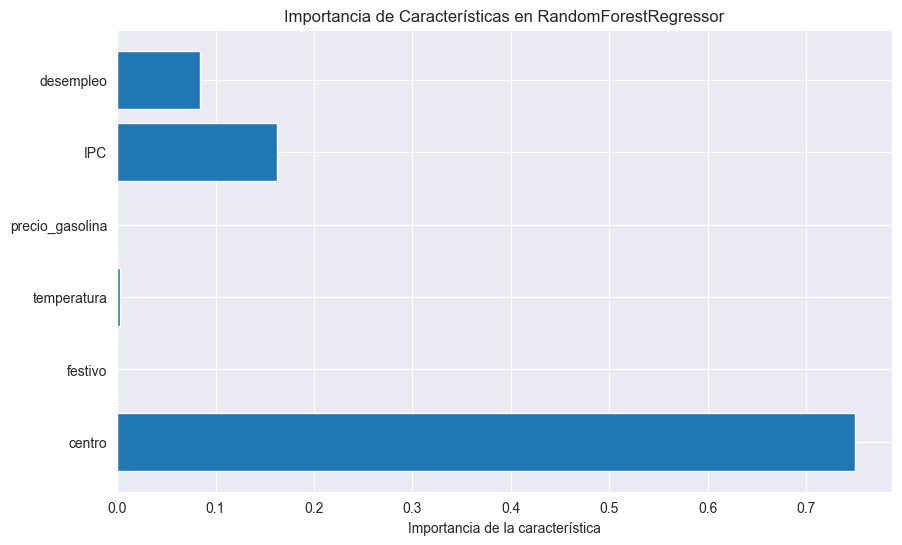

In [11]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear gráfico de barras de importancias
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances, align="center")
plt.yticks(range(X_train.shape[1]), X.columns)
plt.xlabel("Importancia de la característica")
plt.title("Importancia de Características en RandomForestRegressor")
plt.show()
